In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

filter = 100

In [2]:
def plot(data, error, ecolor='r', fmt='--', label=None):
    x = data[0, :]
    y = data[1, :]
    plt.errorbar(x, y, yerr=error, ecolor=ecolor, capsize=3, fmt=fmt, label=label)

In [3]:
data_baseline = get_mixrw_latency('../results/MRW-24-30-3', step=10)

avg_baseline = np.zeros((2, 11))
std_baseline = np.zeros((11))
cnt = 0
for i, d in data_baseline.items():
    avg_baseline[0, cnt] = i
    avg_baseline[1, cnt], std_baseline[cnt] = avg_latency(d, filter=filter)
    cnt += 1

fn 2-MIXREADWRITE-0.0_timings.dat
fn 11-MIXREADWRITE-0.0_timings.dat
fn 20-MIXREADWRITE-0.0_timings.dat
fn 12-MIXREADWRITE-0.0_timings.dat
fn 23-MIXREADWRITE-0.0_timings.dat
fn 1-MIXREADWRITE-0.0_timings.dat
fn 14-MIXREADWRITE-0.0_timings.dat
fn 9-MIXREADWRITE-0.0_timings.dat
fn 7-MIXREADWRITE-0.0_timings.dat
fn 4-MIXREADWRITE-0.0_timings.dat
fn 19-MIXREADWRITE-0.0_timings.dat
fn 17-MIXREADWRITE-0.0_timings.dat
fn 5-MIXREADWRITE-0.0_timings.dat
fn 16-MIXREADWRITE-0.0_timings.dat
fn 18-MIXREADWRITE-0.0_timings.dat
fn 15-MIXREADWRITE-0.0_timings.dat
fn 6-MIXREADWRITE-0.0_timings.dat
fn 8-MIXREADWRITE-0.0_timings.dat
fn 22-MIXREADWRITE-0.0_timings.dat
fn 13-MIXREADWRITE-0.0_timings.dat
fn 0-MIXREADWRITE-0.0_timings.dat
fn 3-MIXREADWRITE-0.0_timings.dat
fn 21-MIXREADWRITE-0.0_timings.dat
fn 10-MIXREADWRITE-0.0_timings.dat
fn 8-MIXREADWRITE-0.1_timings.dat
fn 6-MIXREADWRITE-0.1_timings.dat
fn 15-MIXREADWRITE-0.1_timings.dat
fn 18-MIXREADWRITE-0.1_timings.dat
fn 16-MIXREADWRITE-0.1_timings.d

In [4]:
data_contention = get_mixrw_latency('../results/Contention-24-30-3', step=10)

avg_contention = np.zeros((2, 11))
std_contention = np.zeros((11))
cnt = 0
for i, d in data_contention.items():
    avg_contention[0, cnt] = i
    avg_contention[1, cnt], std_contention[cnt] = avg_latency(d, filter=filter)
    cnt += 1

fn 2-MIXREADWRITE-0.0_timings.dat
fn 11-MIXREADWRITE-0.0_timings.dat
fn 20-MIXREADWRITE-0.0_timings.dat
fn 12-MIXREADWRITE-0.0_timings.dat
fn 23-MIXREADWRITE-0.0_timings.dat
fn 1-MIXREADWRITE-0.0_timings.dat
fn 14-MIXREADWRITE-0.0_timings.dat
fn 9-MIXREADWRITE-0.0_timings.dat
fn 7-MIXREADWRITE-0.0_timings.dat
fn 4-MIXREADWRITE-0.0_timings.dat
fn 19-MIXREADWRITE-0.0_timings.dat
fn 17-MIXREADWRITE-0.0_timings.dat
fn 5-MIXREADWRITE-0.0_timings.dat
fn 16-MIXREADWRITE-0.0_timings.dat
fn 18-MIXREADWRITE-0.0_timings.dat
fn 15-MIXREADWRITE-0.0_timings.dat
fn 6-MIXREADWRITE-0.0_timings.dat
fn 8-MIXREADWRITE-0.0_timings.dat
fn 22-MIXREADWRITE-0.0_timings.dat
fn 13-MIXREADWRITE-0.0_timings.dat
fn 0-MIXREADWRITE-0.0_timings.dat
fn 3-MIXREADWRITE-0.0_timings.dat
fn 21-MIXREADWRITE-0.0_timings.dat
fn 10-MIXREADWRITE-0.0_timings.dat
fn 8-MIXREADWRITE-0.1_timings.dat
fn 6-MIXREADWRITE-0.1_timings.dat
fn 15-MIXREADWRITE-0.1_timings.dat
fn 18-MIXREADWRITE-0.1_timings.dat
fn 16-MIXREADWRITE-0.1_timings.d

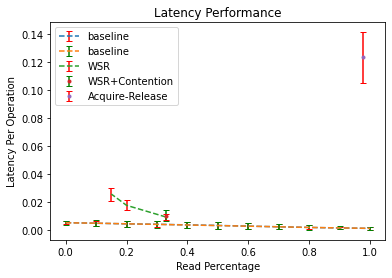

In [5]:
# data refer to WSR.ipynb
x_wsr = [0.33, 0.2, 0.15]
avg_wsr = [0.009284072897474916, 0.017637420153320593, 0.025673932902555506]
std_wsr = [0.0020912848857143444, 0.0035430096882721443, 0.004636166318799938]
avg_wsr_contention = 0.010296491943389316
std_wsr_contention = 0.0036746485015700706

# data refer to lock.ipynb
x_ar = 0.9758419435335849
avg_ar = 0.12312439654157417
std_ar = 0.017987144193201878
avg_mutex = 0.08123524992900606
std_mutex = 0.007262383371640504

plt.figure()

plot(avg_baseline, std_baseline, ecolor='r', label='baseline')
plot(avg_contention, std_contention, ecolor='g', label='baseline')
plot(np.array([x_wsr, avg_wsr]), std_wsr, ecolor='r', fmt='--', label='WSR')
plot(np.array([[0.33], [avg_wsr_contention]]), [std_wsr_contention], ecolor='g', fmt='.', label='WSR+Contention')
plot(np.array([[x_ar], [avg_ar]]), [std_ar], ecolor='r', fmt='.', label='Acquire-Release')

plt.xlabel('Read Percentage')
plt.ylabel('Latency Per Operation')
plt.title('Latency Performance')
plt.legend()
plt.show()

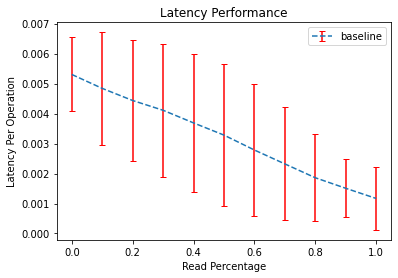

In [6]:
plt.figure()

plot(avg_baseline, std_baseline, ecolor='r', label='baseline')

plt.xlabel('Read Percentage')
plt.ylabel('Latency Per Operation (s)')
plt.title('Latency Performance')
plt.legend()

plt.savefig('latency_plots/baseline.png')
plt.show()

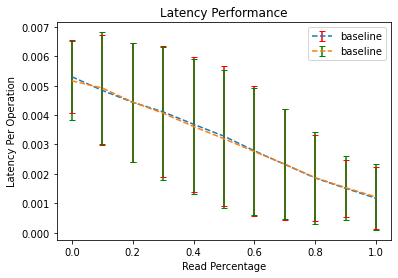

In [7]:
plt.figure()

plot(avg_baseline, std_baseline, ecolor='r', label='baseline')
plot(avg_contention, std_contention, ecolor='g', label='baseline')

plt.xlabel('Read Percentage')
plt.ylabel('Latency Per Operation (s)')
plt.title('Latency Performance')
plt.legend()

plt.savefig('latency_plots/contention.png')
plt.show()

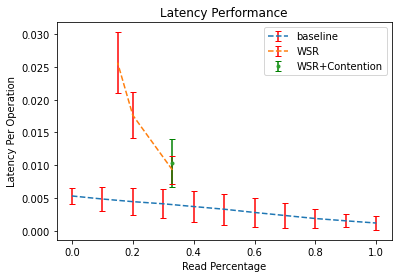

In [8]:
plt.figure()

plot(avg_baseline, std_baseline, ecolor='r', label='baseline')
plot(np.array([x_wsr, avg_wsr]), std_wsr, ecolor='r', fmt='--', label='WSR')
plot(np.array([[0.33], [avg_wsr_contention]]), [std_wsr_contention], ecolor='g', fmt='.', label='WSR+Contention')

plt.xlabel('Read Percentage')
plt.ylabel('Latency Per Operation (s)')
plt.title('Latency Performance')
plt.legend()

plt.savefig('latency_plots/WSR.png')
plt.show()

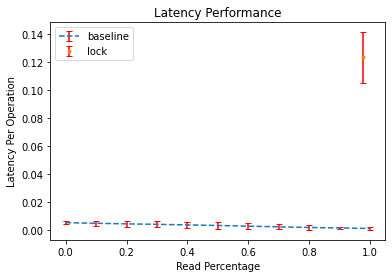

In [9]:

plt.figure()

plot(avg_baseline, std_baseline, ecolor='r', label='baseline')
plot(np.array([[x_ar], [avg_ar]]), [std_ar], ecolor='r', fmt='.', label='lock')

plt.xlabel('Read Percentage')
plt.ylabel('Latency Per Operation (s)')
plt.title('Latency Performance')
plt.legend()

plt.savefig('latency_plots/lock.png')
plt.show()